In [1]:
import numpy as np
from utils import Representation, Interval
from IPython.display import Image, display

# Example in 2D

Let us consider a 3x3 2D grid:

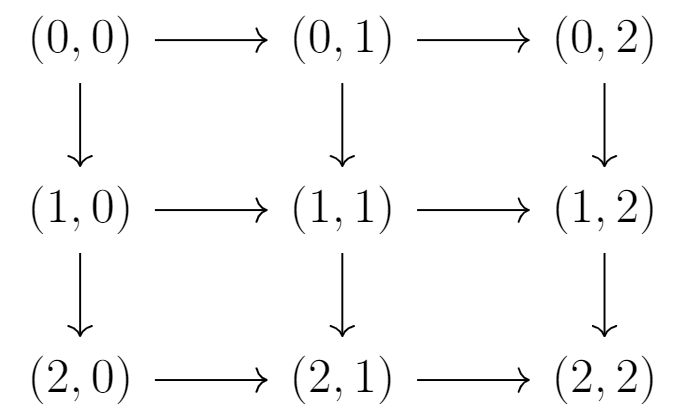

In [2]:
display(Image("img/quiver.png", width=400))

And its representation:

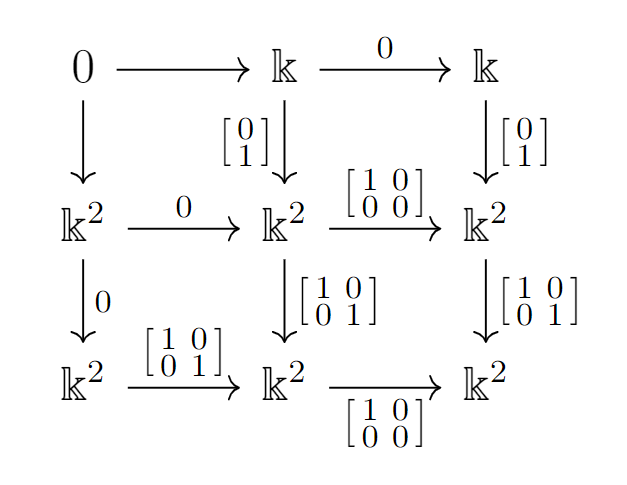

In [3]:
display(Image("img/representation.png", width=400))

First we instantiate a Representation object.

In [4]:
dimensions = [3, 3]  # 2D Grid 3x3
rep = Representation(dimensions)

Now we can add vertices.

In [5]:
# Manually add vector spaces
rep.create_vecs((0, 0), 0)
rep.create_vecs((0, 1), 1)
rep.create_vecs((0, 2), 1)
rep.create_vecs((1, 0), 2)
rep.create_vecs((1, 1), 2)
rep.create_vecs((1, 2), 2)
rep.create_vecs((2, 0), 2)
rep.create_vecs((2, 1), 2)
rep.create_vecs((2, 2), 2)

We can visualize the Representation object (note that this works only for 1D or 2D grids).

In [6]:
rep.display()

0          1          1
                                 
                                 
                                 
2          2          2
                                 
                                 
                                 
2          2          2


Now we can add matrices. For example, we can add the identity matrix between vertex (2,0) and vertex (2,1).

In [7]:
rep.create_matrix((2, 0), (2, 1), np.array([[1, 0], [0, 1]]))

In [8]:
rep.display()

0          1          1
                                 
                                 
                                 
2          2          2
                                 
                                 
                                 
2 -------> 2          2


Let's add the other matrices.

In [9]:
rep.create_matrix((0, 0), (0, 1), None)
rep.create_matrix((0, 1), (0, 2), None)
rep.create_matrix((1, 0), (1, 1), np.array([[0, 0], [0, 0]]))
rep.create_matrix((1, 1), (1, 2), np.array([[1, 0], [0, 0]]))
rep.create_matrix((2, 1), (2, 2), np.array([[1, 0], [0, 0]]))
rep.create_matrix((0, 0), (1, 0), None)
rep.create_matrix((1, 0), (2, 0), np.array([[0, 0], [0, 0]]))
rep.create_matrix((0, 1), (1, 1), np.array([[0], [1]]))
rep.create_matrix((1, 1), (2, 1), np.array([[1, 0], [0, 1]]))
rep.create_matrix((0, 2), (1, 2), np.array([[0], [1]]))
rep.create_matrix((1, 2), (2, 2), np.array([[1, 0], [0, 1]]))

In [10]:
rep.display()

0 -------> 1 -------> 1
|          |          |          
|          |          |          
v          v          v          
2 -------> 2 -------> 2
|          |          |          
|          |          |          
v          v          v          
2 -------> 2 -------> 2


We can print the elements in the instance rep.

In [11]:
rep.elements()

Nodes: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Edges: [((0, 0), (0, 0)), ((0, 0), (0, 1)), ((0, 0), (0, 2)), ((0, 0), (1, 0)), ((0, 0), (1, 1)), ((0, 0), (1, 2)), ((0, 0), (2, 0)), ((0, 0), (2, 1)), ((0, 0), (2, 2)), ((0, 1), (0, 1)), ((0, 1), (0, 2)), ((0, 1), (1, 1)), ((0, 1), (1, 2)), ((0, 1), (2, 1)), ((0, 1), (2, 2)), ((0, 2), (0, 2)), ((0, 2), (1, 2)), ((0, 2), (2, 2)), ((1, 0), (1, 0)), ((1, 0), (1, 1)), ((1, 0), (1, 2)), ((1, 0), (2, 0)), ((1, 0), (2, 1)), ((1, 0), (2, 2)), ((1, 1), (1, 1)), ((1, 1), (1, 2)), ((1, 1), (2, 1)), ((1, 1), (2, 2)), ((1, 2), (1, 2)), ((1, 2), (2, 2)), ((2, 0), (2, 0)), ((2, 0), (2, 1)), ((2, 0), (2, 2)), ((2, 1), (2, 1)), ((2, 1), (2, 2)), ((2, 2), (2, 2))]
Vector spaces: {(0, 0): 0, (0, 1): 1, (0, 2): 1, (1, 0): 2, (1, 1): 2, (1, 2): 2, (2, 0): 2, (2, 1): 2, (2, 2): 2}
Matrices: {((2, 0), (2, 1)): array([[1, 0],
       [0, 1]]), ((0, 0), (0, 1)): None, ((0, 1), (0, 2)): None, ((1, 0), (1, 1)): array([[0, 0],
       

Given a path $\rho: x \rightarrow y$, we can evaluate $M(\rho)$.

In [12]:
rep.evaluation((0,1), (2,2))

array([[0.],
       [0.]])

### Intervals

We can define intervals by providing a list of sources and a list of sinks.

In [13]:
interval1 = Interval([(2,0),(1,1),(0,2)], [(2,2)]) # interval with 3 sources: (2,0),(1,1),(0,2) and 1 sink: (2,2)

### Interval ranks

We can construct the matrices M and N that appear in the formula for the interval rank.

In [14]:
print(rep.matrix_M(interval1))

[[ 1.  0. -1. -0.  0.]
 [ 0.  1. -0. -1.  0.]
 [ 1.  0.  0.  0. -0.]
 [ 0.  0.  0.  0. -1.]
 [ 0.  0.  1.  0. -0.]
 [ 0.  0.  0.  0. -1.]]


In [15]:
print(rep.matrix_N(interval1))

[]


And finally we can compute the interval rank.

In [16]:
print(rep.int_rank(interval1))

0


### Interval replacements

Let's compute some interval replacements. The computation uses the formula with the cover of intervals.

In [17]:
interval2 = Interval([(0,1), (2,0)], [(0,2), (2,1)])

In [18]:
rep.int_replacement(interval2)

0

In [19]:
print(rep.int_rank(interval2)) # check interval rank
print(rep.cover(interval2)) # check cover of the interval

0
[[(0, 1), (2, 1), (1, 1), (2, 0), (0, 2), (1, 0)], [(0, 1), (2, 1), (1, 1), (2, 0), (0, 2), (1, 2)]]


We can get all the interval replacements as follows.

In [20]:
intervals = rep.list_int(conv=False)
for itv in intervals:
    repl = rep.int_replacement(itv)
    if repl != 0 :
        print(f"Interval with sources {itv.src} and sinks {itv.snk}")
        rep.display_interval(itv)
        print(f"Interval replacement: {rep.int_replacement(itv)}")

Interval with sources [(1, 0)] and sinks [(1, 0)]
.          .          .
                                 
                                 
                                 
X          .          .
                                 
                                 
                                 
.          .          .
Interval replacement: 2
Interval with sources [(0, 2)] and sinks [(2, 2)]
.          .          X
                      |          
                      |          
                      v          
.          .          X
                      |          
                      |          
                      v          
.          .          X
Interval replacement: 1
Interval with sources [(0, 1), (2, 0)] and sinks [(2, 1)]
.          X          .
           |                     
           |                     
           v                     
.          X          .
           |                     
           |                     
           v            

In [21]:
print(len(intervals))

83


# Example in 1D

In [22]:
rep2 = Representation([4])
rep2.create_vecs((0,), 1) # note: to create a tuple with one element we need to add a comma after the element
rep2.create_vecs((1,), 1)
rep2.create_vecs((2,), 2)
rep2.create_vecs((3,), 2)
rep2.create_matrix((0,), (1,), np.array([[0]]))
rep2.create_matrix((1,), (2,), np.array([[1],[0]]))
rep2.create_matrix((2,), (3,), np.array([[1,0],[0,1]]))
rep2.display()

1 -------> 1 -------> 2 -------> 2


In [23]:
print(rep2.int_rank(Interval([(0,)],[(1,)])))
print(rep2.int_rank(Interval([(2,)],[(3,)])))

0
2


In [24]:
intervals = rep2.list_int(conv=False)
for itv in intervals:
    repl = rep2.int_replacement(itv)
    if repl != 0 :
        print(f"Interval with sources {itv.src} and sinks {itv.snk}")
        rep
        rep2.display_interval(itv)
        print(f"Interval replacement: {rep2.int_replacement(itv)}")

Interval with sources [(0,)] and sinks [(0,)]
X          .          .          .
Interval replacement: 1
Interval with sources [(2,)] and sinks [(3,)]
.          .          X -------> X
Interval replacement: 1
Interval with sources [(1,)] and sinks [(3,)]
.          X -------> X -------> X
Interval replacement: 1
